Batman! lets load couple of required libraries which we will require in our analysis before we jump into predicting JOKER and we will see that joker is not entirely random

In [1]:
#loading required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import os
print(os.listdir("../input"))


['bat_signal_data.csv', 'moon_phases_data.csv', 'sensor_data.csv', 'weather_data.csv']


**Lets load the dataset to see what information batman needs to know and prove him that joker isn't entirely random and he can predict the future. In this case JOKER!!!!!!!!**

In the **First** part we will predict joker present using just sensor_data dataset and later in the **Second** part we will combine all the given dataset and make predictions and see which one peforms better

**PART 1**

In [2]:
#loading sensor_data
data = pd.read_csv('../input/sensor_data.csv')
data.head(5)

,Timestamp,x,y,z,number of citizens,number of thugs,joker present?
0,1519862400,-1.0,-1.0,-1.0,12271,11,no
1,1519866000,-1.0,-1.0,-1.0,10169,5,no
2,1519869600,-1.0,-1.0,-1.0,12381,5,no
3,1519873200,-1.0,-1.0,-1.0,11283,9,no
4,1519876800,-1.0,-1.0,-1.0,10289,10,no


In [3]:
# checking datatypes of all the features
data.dtypes

Timestamp               int64
x                     float64
y                     float64
z                     float64
number of citizens      int64
number of thugs         int64
joker present?         object
dtype: object

It looks like we need to change some of their datatypes.

In [4]:
data = data.astype({"x": int, "y": int, "z": int})
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [5]:
# checking datatypes again after correction
data.dtypes

Timestamp             datetime64[ns]
x                              int64
y                              int64
z                              int64
number of citizens             int64
number of thugs                int64
joker present?                object
dtype: object

PERFECT!!!!! we are ready to analyze this dataset

Lets check for the **total number of records** in the dataset

In [6]:
len(data)

236520

Lets check for **null values** in the dataset. 

In [7]:
data.isnull().sum()

Timestamp             0
x                     0
y                     0
z                     0
number of citizens    0
number of thugs       0
joker present?        0
dtype: int64

AWESOME! There are no null values in the data. Lets proceed to further analysis.

Lets check **target** variable distribution. Here target variable is **Joker Present?**. This will give us the idea of class balance/imbalance. 

no     227760
yes      8760
Name: joker present?, dtype: int64


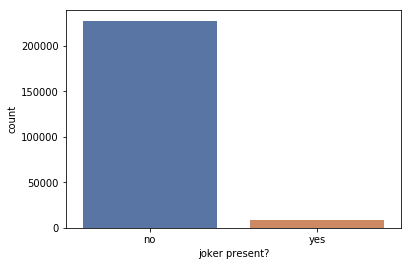

In [8]:
print(data['joker present?'].value_counts())
sns.countplot(x='joker present?', data=data, palette="deep")
#data['joker present?'].value_counts().plot.bar()

WOW! looks like majority of the records says that joker present?  is No. This shows that this is an **unbalanced classification problem** since only 5% records has joker present? as Yes. Lets move on keeping this in mind.

Lets check **Univariate analysis** to get an idea on its distribution.

**********X***************
-1    78840
 1    78840
 0    78840
Name: x, dtype: int64
******************************
**********Y**************
-1    78840
 1    78840
 0    78840
Name: y, dtype: int64
******************************
***********Z********
-1    78840
 1    78840
 0    78840
Name: z, dtype: int64


Text(0.5, 0, 'number of thugs')

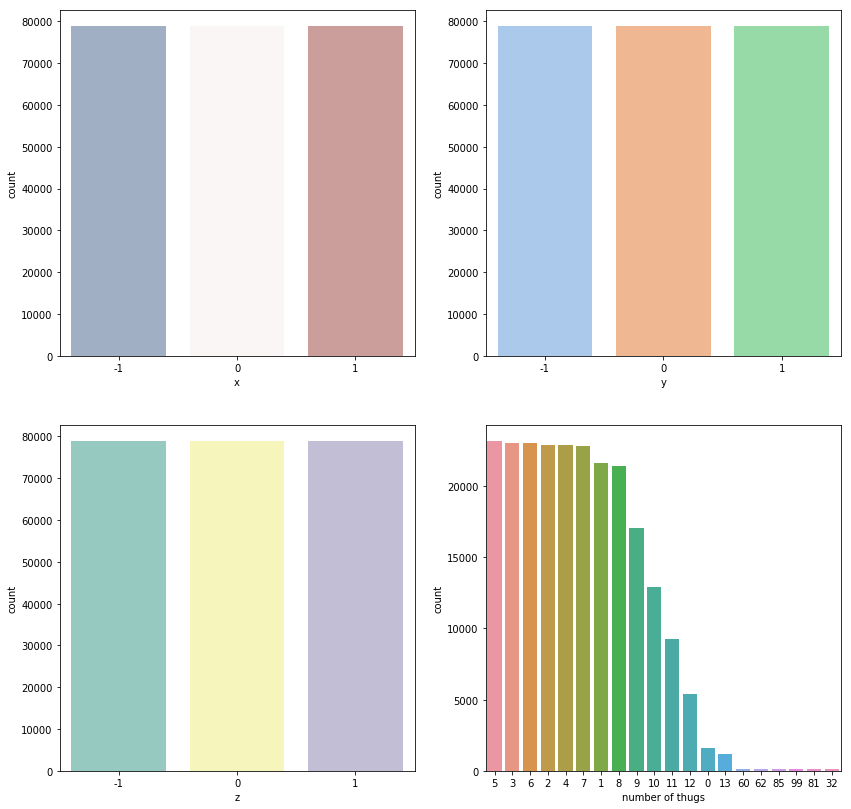

In [9]:
import seaborn as sns
import matplotlib.pyplot as plot
print("**********X***************")
print(data['x'].value_counts())
print("******************************")
print("**********Y**************")
print(data['y'].value_counts())
print("******************************")
print("***********Z********")
print(data['z'].value_counts())


plot.figure(figsize=(14,14))
plot.subplot(2,2,1)
ax = sns.countplot(x='y', data=data, palette="vlag")
ax.set_xlabel("x")

plot.subplot(2,2,2)
ax = sns.countplot(x='y', data=data, palette="pastel")
ax.set_xlabel("y")

plot.subplot(2,2,3)
ax = sns.countplot(x='z', data=data, palette="Set3")
ax.set_xlabel("z")

plot.subplot(2,2,4)
ax = sns.countplot(x='number of thugs',data=data,order=pd.value_counts(data['number of thugs']).iloc[:20].index)
ax.set_xlabel("number of thugs")


Interesting!!! all setup sensor coordinates (x,y and z) distribution are equal. This proves that sensor are scattered in a very organized fashion. Cool.

Lets do some **Bivariate Analysis**.

In [10]:
df1 = data['number of thugs'].value_counts()[:20]
df1

5     23133
3     23030
6     22986
2     22867
4     22842
7     22830
1     21629
8     21398
9     17020
10    12937
11     9229
12     5410
0      1603
13     1199
60      119
62      117
85      117
99      114
81      111
32      111
Name: number of thugs, dtype: int64

Text(0.5, 0, 'z')

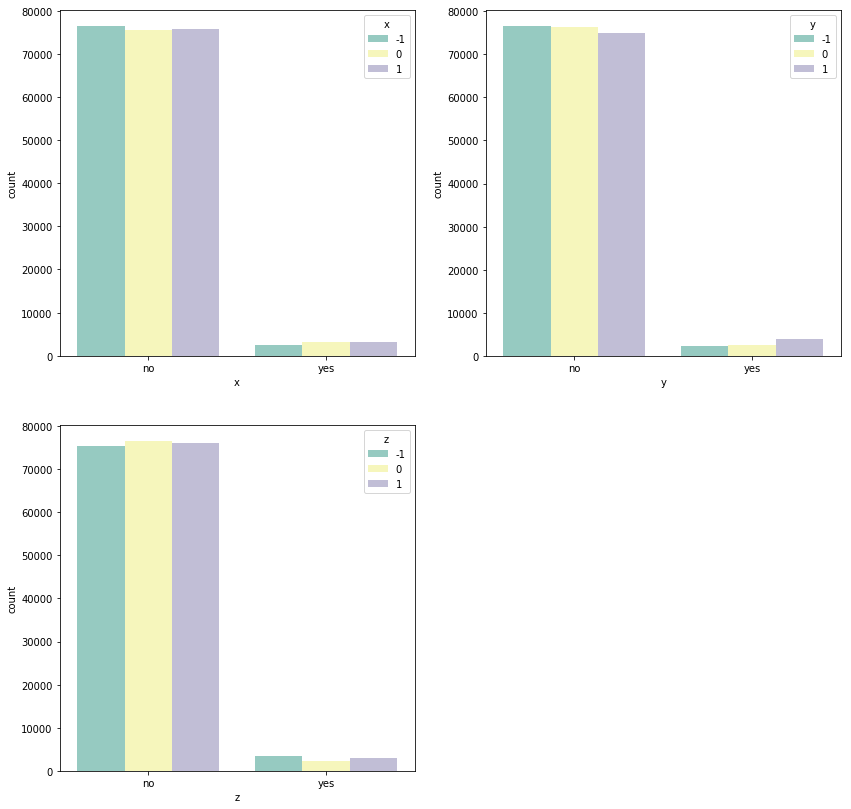

In [11]:
plot.figure(figsize=(14,14))
plot.subplot(2,2,1)
ax = sns.countplot(x=data['joker present?'],hue=data['x'],data=data, palette="Set3")
ax.set_xlabel("x")

plot.subplot(2,2,2)
ax = sns.countplot(x=data['joker present?'],hue=data['y'],data=data, palette="Set3")
ax.set_xlabel("y")

plot.subplot(2,2,3)
ax = sns.countplot(x=data['joker present?'],hue=data['z'],data=data, palette="Set3")
ax.set_xlabel("z")



Let's check whether we have noise (outliers) in our dataset which might hinder our analyis.... sounds good?

Text(0.5, 0, 'Number of thugs')

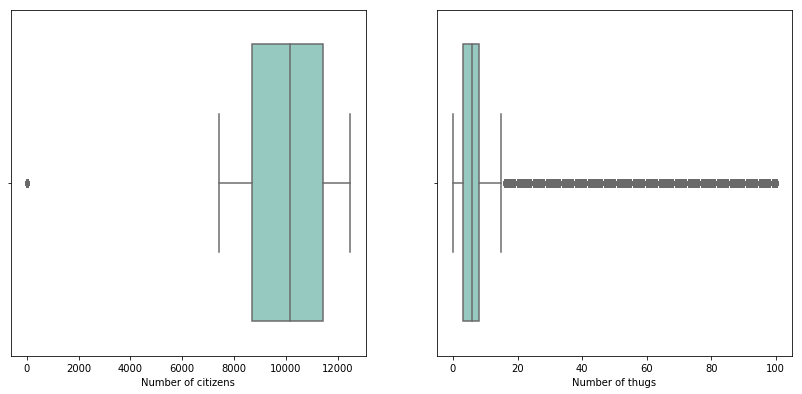

In [12]:
plot.figure(figsize=(14,14))
plot.subplot(2,2,1)
ax = sns.boxplot(x="number of citizens", data=data, palette="Set3")
ax.set_xlabel("Number of citizens")

plot.subplot(2,2,2)
ax = sns.boxplot(x="number of thugs", data=data, palette="Set3")
ax.set_xlabel("Number of thugs")

Did you see **number of thugs** feature looks like having lot of outliers? Okay we will keep this in mind.

Now, lets **encode** our target variable (Joker Present?), so that later modeling part makes more sense. 

In [13]:
data['joker present?'].replace({'no':0, 'yes':1}, inplace=True)

Do you want to see datatypes again of this dataset to see whether the above change worked?

In [14]:
data.dtypes

Timestamp             datetime64[ns]
x                              int64
y                              int64
z                              int64
number of citizens             int64
number of thugs                int64
joker present?                 int64
dtype: object

COOL!!!

Lets see how these features are **correalted** to each other. 

In [15]:
# checking correlation
corr = data.corr()
abs(corr['joker present?']).sort_values(ascending=False)

joker present?        1.000000
number of thugs       0.072419
number of citizens    0.064675
y                     0.045461
x                     0.018563
z                     0.017302
Name: joker present?, dtype: float64

It looks that the largest correlation value is 0.07 which is very less. Since, the dependent/target variable (joker present?) is binary and independent variables are continuous, in such scenario, correlation is not a good matrix to judge. 

Lets drop Timestamp feature, since it seems not useful here in our problem.

In [16]:
#data1= data

data1 = data.copy(deep=True)

In [17]:
data1.drop(['Timestamp'],axis=1, inplace=True)

Again! checking dataset to see change effect

In [18]:
data1.head(5)

,x,y,z,number of citizens,number of thugs,joker present?
0,-1,-1,-1,12271,11,0
1,-1,-1,-1,10169,5,0
2,-1,-1,-1,12381,5,0
3,-1,-1,-1,11283,9,0
4,-1,-1,-1,10289,10,0


In [19]:
data.head(5)

,Timestamp,x,y,z,number of citizens,number of thugs,joker present?
0,1970-01-01 00:00:01.519862400,-1,-1,-1,12271,11,0
1,1970-01-01 00:00:01.519866000,-1,-1,-1,10169,5,0
2,1970-01-01 00:00:01.519869600,-1,-1,-1,12381,5,0
3,1970-01-01 00:00:01.519873200,-1,-1,-1,11283,9,0
4,1970-01-01 00:00:01.519876800,-1,-1,-1,10289,10,0


AWESOME!! we are ready to move on model building part. 

Lets first create base model to see **Feature Importance**. 

In [20]:
#separating target variable.
y = data1['joker present?']
data1.drop(['joker present?'],axis=1, inplace=True)

In [21]:
# splitting our dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size = 0.3, random_state = 100)

In [22]:
len(y_test)

70956

Alright! lets build our base model using **Lightgbm** algorithm and see feature importance. sounds good?

In [23]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(n_estimator=2000, 
                         learning_rate =0.08
                         )
model_lgb.fit(X_train, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.08, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimator=2000, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [24]:
eli5.explain_weights(model_lgb)

Weight,Feature
0.5024,number_of_citizens
0.1565,number_of_thugs
0.1252,y
0.1139,x
0.1020,z


Cool! so it looks like number of citizens is more important feature in our dataset followed by number of thugs. Hmmm. 

Lets predict the future and see how accurate it is with lightgbm algorithm on test data

In [25]:
y_pred_lgbm = model_lgb.predict(X_test)

**Confusion Matrix?** lets check it.

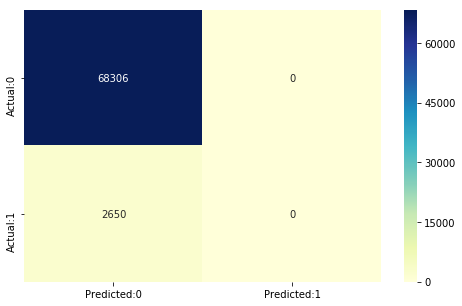

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lgbm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

OK! so the above confusion matrix shows that out of 70956 records test dataset, our model with LGBMClassifier shows (68306+0) = 68306 correct prediction and (2650+0) = 2650 incorrect prediction

Lets check other score matrix....

In [27]:
print(classification_report(y_test,y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     68306
           1       0.00      0.00      0.00      2650

   micro avg       0.96      0.96      0.96     70956
   macro avg       0.48      0.50      0.49     70956
weighted avg       0.93      0.96      0.94     70956



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
print("Accuracy score with baseline lightgbm:", metrics.accuracy_score(y_test, y_pred_lgbm))
print("roc_auc score with decision tree:", roc_auc_score(y_test, y_pred_lgbm))

Accuracy score with baseline lightgbm: 0.9626529116635661
roc_auc score with decision tree: 0.5


Allright! so **accuracy** of the model with lightgbm is 96%

In [29]:
cv_scores = cross_val_score(model_lgb, X_train, y_train, cv=10)
cv_scores

array([0.96309718, 0.96309718, 0.96309718, 0.96309718, 0.96309495,
       0.96309495, 0.96309495, 0.96309495, 0.96309495, 0.96309495])

In [30]:
print("Mean validation auc: {:.4f} +/- {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

Mean validation auc: 0.9631 +/- 0.0000


Lets move on using another classification algorithm. **Decision Tree** and lets use class_weight as balanced because our dataset looks unbalanced. class_weight as balanced uses the values of target variable to automatically adjust weights inversely proportional to class frequencies in the input data.

In [31]:
from sklearn.tree import DecisionTreeClassifier
#model_decision = DecisionTreeClassifier(min_samples_split=20, random_state=100)
model_decision = DecisionTreeClassifier(class_weight="balanced", random_state=100, max_depth=1)
model_decision.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [32]:
y_pred_decision = model_decision.predict(X_test)

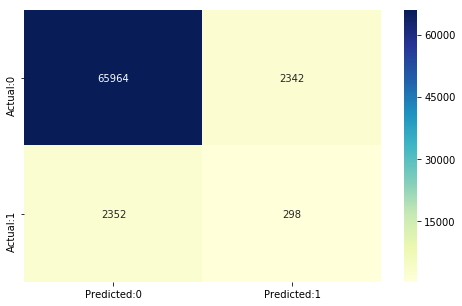

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_decision)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

So the above confusion matrix shows that out of 70956 records test dataset, our model with decision tree shows (65964+298) = 66262 correct predictions and (2352+2342) = 4694 incorrect predictions

Lets check other score metrics for our model with decision tree.

In [34]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     68306
           1       0.11      0.11      0.11      2650

   micro avg       0.93      0.93      0.93     70956
   macro avg       0.54      0.54      0.54     70956
weighted avg       0.93      0.93      0.93     70956



In [35]:
print("Accuracy score with decision tree:", metrics.accuracy_score(y_test, y_pred_decision))
print("roc_auc score with decision tree:", roc_auc_score(y_test, y_pred_decision))

Accuracy score with decision tree: 0.9338463273014262
roc_auc score with decision tree: 0.5390829723513888


OK! so the **accuracy** of the model with decision tree is 93%

In [36]:
cv_scores = cross_val_score(model_decision, X_train, y_train, cv=10)
cv_scores

array([0.93742828, 0.93410642, 0.93410642, 0.93410642, 0.93361923,
       0.93525006, 0.93446485, 0.93295482, 0.93531046, 0.93422324])

In [37]:
print("Mean validation auc: {:.4f} +/- {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

Mean validation auc: 0.9346 +/- 0.0012


Now lets try simplest **Logistic Regression** to your dataset.

In [38]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log=logreg.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


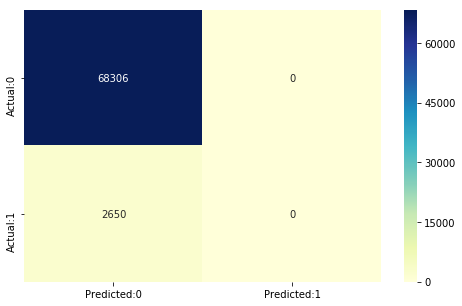

In [39]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_log)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

So the above confusion matrix shows that out of 70956 records test dataset, our model with decision tree shows (68306+0) = 68306 correct predictions and (2650+0) =2650  incorrect predictions

Allright! we will check other score metrics now...

In [40]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     68306
           1       0.00      0.00      0.00      2650

   micro avg       0.96      0.96      0.96     70956
   macro avg       0.48      0.50      0.49     70956
weighted avg       0.93      0.96      0.94     70956



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
print("Accuracy score with logistic regression:", metrics.accuracy_score(y_test, y_pred_log))
print("roc_auc score with logistic regression:", roc_auc_score(y_test, y_pred_log))

Accuracy score with logistic regression: 0.9626529116635661
roc_auc score with logistic regression: 0.5


Lets check whether we can improve sensitivity/recall score with different threshold. That means when joker is actually present, how often does our model predict that the joker is present?

In [42]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[66754  1552]
 [ 2470   180]] 
 with 66934 correct predictions and 2470 Type II errors( False Negatives) 

 Sensitivity:  0.06792452830188679 Specificity:  0.9772787163645946 



With 0.2 threshold the Confusion Matrix is  
 [[67483   823]
 [ 2552    98]] 
 with 67581 correct predictions and 2552 Type II errors( False Negatives) 

 Sensitivity:  0.0369811320754717 Specificity:  0.9879512780722045 



With 0.3 threshold the Confusion Matrix is  
 [[67945   361]
 [ 2606    44]] 
 with 67989 correct predictions and 2606 Type II errors( False Negatives) 

 Sensitivity:  0.01660377358490566 Specificity:  0.9947149591543935 



With 0.4 threshold the Confusion Matrix is  
 [[68306     0]
 [ 2650     0]] 
 with 68306 correct predictions and 2650 Type II errors( False Negatives) 

 Sensitivity:  0.0 Specificity:  1.0 





Looks like maximimum sensitivity achieved is 0.06. 

Now let see ROC-AUC curve through visualization. 

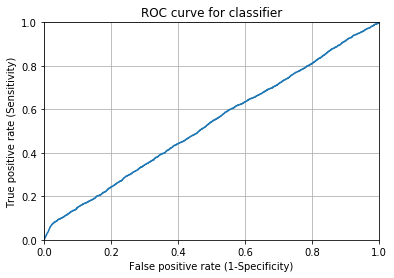

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [44]:
cv_scores = cross_val_score(logreg, X_train, y_train, cv=10)
print("Mean validation auc: {:.4f} +/- {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Mean validation auc: 0.9631 +/- 0.0000


Want to do **Random Forest?** Lets check that as well. 

In [45]:
from sklearn.ensemble import RandomForestClassifier
random_classifier= RandomForestClassifier(class_weight="balanced", random_state=100)
random_classifier.fit(X_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=100, verbose=0, warm_start=False)

In [46]:
y_pred_random= random_classifier.predict(X_test)

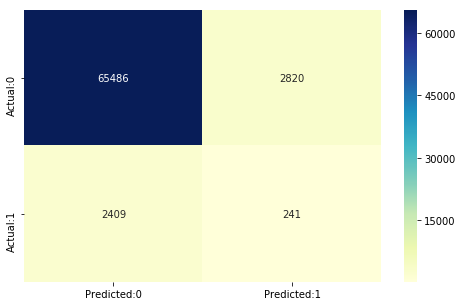

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_random)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

So the above confusion matrix shows that out of 70956 records test dataset, our model with decision tree shows (65486+241) = 65727 correct predictions and (2820+2409) = 5229 incorrect predictions

In [48]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     68306
           1       0.08      0.09      0.08      2650

   micro avg       0.93      0.93      0.93     70956
   macro avg       0.52      0.52      0.52     70956
weighted avg       0.93      0.93      0.93     70956



In [49]:
print("Accuracy score with random forest:", metrics.accuracy_score(y_test, y_pred_random))
print("precision score with random forest:", metrics.precision_score(y_test, y_pred_random))


Accuracy score with random forest: 0.9263064434297311
precision score with random forest: 0.07873244037896113


In [50]:
cv_scores = cross_val_score(random_classifier, X_train, y_train, cv=10)
print("Mean validation auc: {:.4f} +/- {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

Mean validation auc: 0.9281 +/- 0.0015


POLL Time!!! Selecting the best model uptil now.... So, since lightgbm and logistic regression has same and hightest prediction accuracy is 96%. Random Forest also performed very well. Considering the accuracy of the models, we would make **lightgbm** winner because it is more robust to outlier compared to logistic regression in comparison 

**PART 2**

In this part we will combine all the given datasets. We will make analysis and predictions on this combined datasets and see whethere it makes any difference or not. 

In [51]:
#loading all the datasets
data2= data
df1 = pd.read_csv('../input/bat_signal_data.csv')
df2 = pd.read_csv('../input/moon_phases_data.csv')
df3 = pd.read_csv('../input/weather_data.csv')
data2.head(5)

,Timestamp,x,y,z,number of citizens,number of thugs,joker present?
0,1970-01-01 00:00:01.519862400,-1,-1,-1,12271,11,0
1,1970-01-01 00:00:01.519866000,-1,-1,-1,10169,5,0
2,1970-01-01 00:00:01.519869600,-1,-1,-1,12381,5,0
3,1970-01-01 00:00:01.519873200,-1,-1,-1,11283,9,0
4,1970-01-01 00:00:01.519876800,-1,-1,-1,10289,10,0


COOL!! now lets combine all the above datasets

In [52]:
data3= pd.concat([data2, df1, df2, df3], ignore_index=True)
data3.head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Timestamp,joker present?,number of citizens,number of thugs,phase,precip,sky conditions,status,temperature,x,y,z
0,1970-01-01 00:00:01.519862400,0.0,12271.0,11.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
1,1970-01-01 00:00:01.519866,0.0,10169.0,5.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
2,1970-01-01 00:00:01.519869600,0.0,12381.0,5.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
3,1970-01-01 00:00:01.519873200,0.0,11283.0,9.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
4,1970-01-01 00:00:01.519876800,0.0,10289.0,10.0,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0


Lets check the datatypes of all the combined features.......

In [53]:
# checking the data types
data3.dtypes

Timestamp              object
joker present?        float64
number of citizens    float64
number of thugs       float64
phase                  object
precip                 object
sky conditions         object
status                 object
temperature           float64
x                     float64
y                     float64
z                     float64
dtype: object

Hmmm!!! Looks like we want to change datatypes of some of the features..Lets do it!!

In [54]:
data3['x'] = data3['x'].fillna(0).astype(int)
data3['y'] = data3['y'].fillna(0).astype(int)
data3['z'] = data3['z'].fillna(0).astype(int)
data3['joker present?'] = data3['joker present?'].fillna(0).astype(int)
data3['number of citizens'] = data3['number of citizens'].fillna(0).astype(int)
data3['number of thugs'] = data3['number of thugs'].fillna(0).astype(int)
data3['temperature'] = data3['temperature'].fillna(00.00000)

Allright! lets check datatypes again..

In [55]:
data3.dtypes

Timestamp              object
joker present?          int64
number of citizens      int64
number of thugs         int64
phase                  object
precip                 object
sky conditions         object
status                 object
temperature           float64
x                       int64
y                       int64
z                       int64
dtype: object

In [56]:
data3.head(5)

,Timestamp,joker present?,number of citizens,number of thugs,phase,precip,sky conditions,status,temperature,x,y,z
0,1970-01-01 00:00:01.519862400,0,12271,11,NaN,NaN,NaN,NaN,0.0,-1,-1,-1
1,1970-01-01 00:00:01.519866,0,10169,5,NaN,NaN,NaN,NaN,0.0,-1,-1,-1
2,1970-01-01 00:00:01.519869600,0,12381,5,NaN,NaN,NaN,NaN,0.0,-1,-1,-1
3,1970-01-01 00:00:01.519873200,0,11283,9,NaN,NaN,NaN,NaN,0.0,-1,-1,-1
4,1970-01-01 00:00:01.519876800,0,10289,10,NaN,NaN,NaN,NaN,0.0,-1,-1,-1


Looks like we can still see NaNs' in our dataset. Lets manipulate them..

In [57]:
data3['phase'] = data3['phase'].fillna('no info phase')
data3['precip'] = data3['precip'].fillna('no info precip')
data3['sky conditions'] = data3['sky conditions'].fillna('no info sky')
data3['status'] = data3['status'].fillna('no info status')

Want to check our dataset again?

In [58]:
data3.head(5)

,Timestamp,joker present?,number of citizens,number of thugs,phase,precip,sky conditions,status,temperature,x,y,z
0,1970-01-01 00:00:01.519862400,0,12271,11,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1
1,1970-01-01 00:00:01.519866,0,10169,5,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1
2,1970-01-01 00:00:01.519869600,0,12381,5,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1
3,1970-01-01 00:00:01.519873200,0,11283,9,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1
4,1970-01-01 00:00:01.519876800,0,10289,10,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1


**********Phase***************
no info phase      237617
new                   125
waxing gibbous        124
waning gibbous        124
last quarter          124
first quarter         124
waning crescent       124
waxing crescent       124
full moon             124
Name: phase, dtype: int64
******************************
**********precip**************
no info precip    237613
no                   691
rain                 208
snow                  98
Name: precip, dtype: int64
******************************
***********sky conditions********
no info sky      237613
clear               524
cloudy              238
partly cloudy       235
Name: sky conditions, dtype: int64
******************************
*********status*************
no info status    238510
on                   100
Name: status, dtype: int64


Text(0.5, 0, 'status')

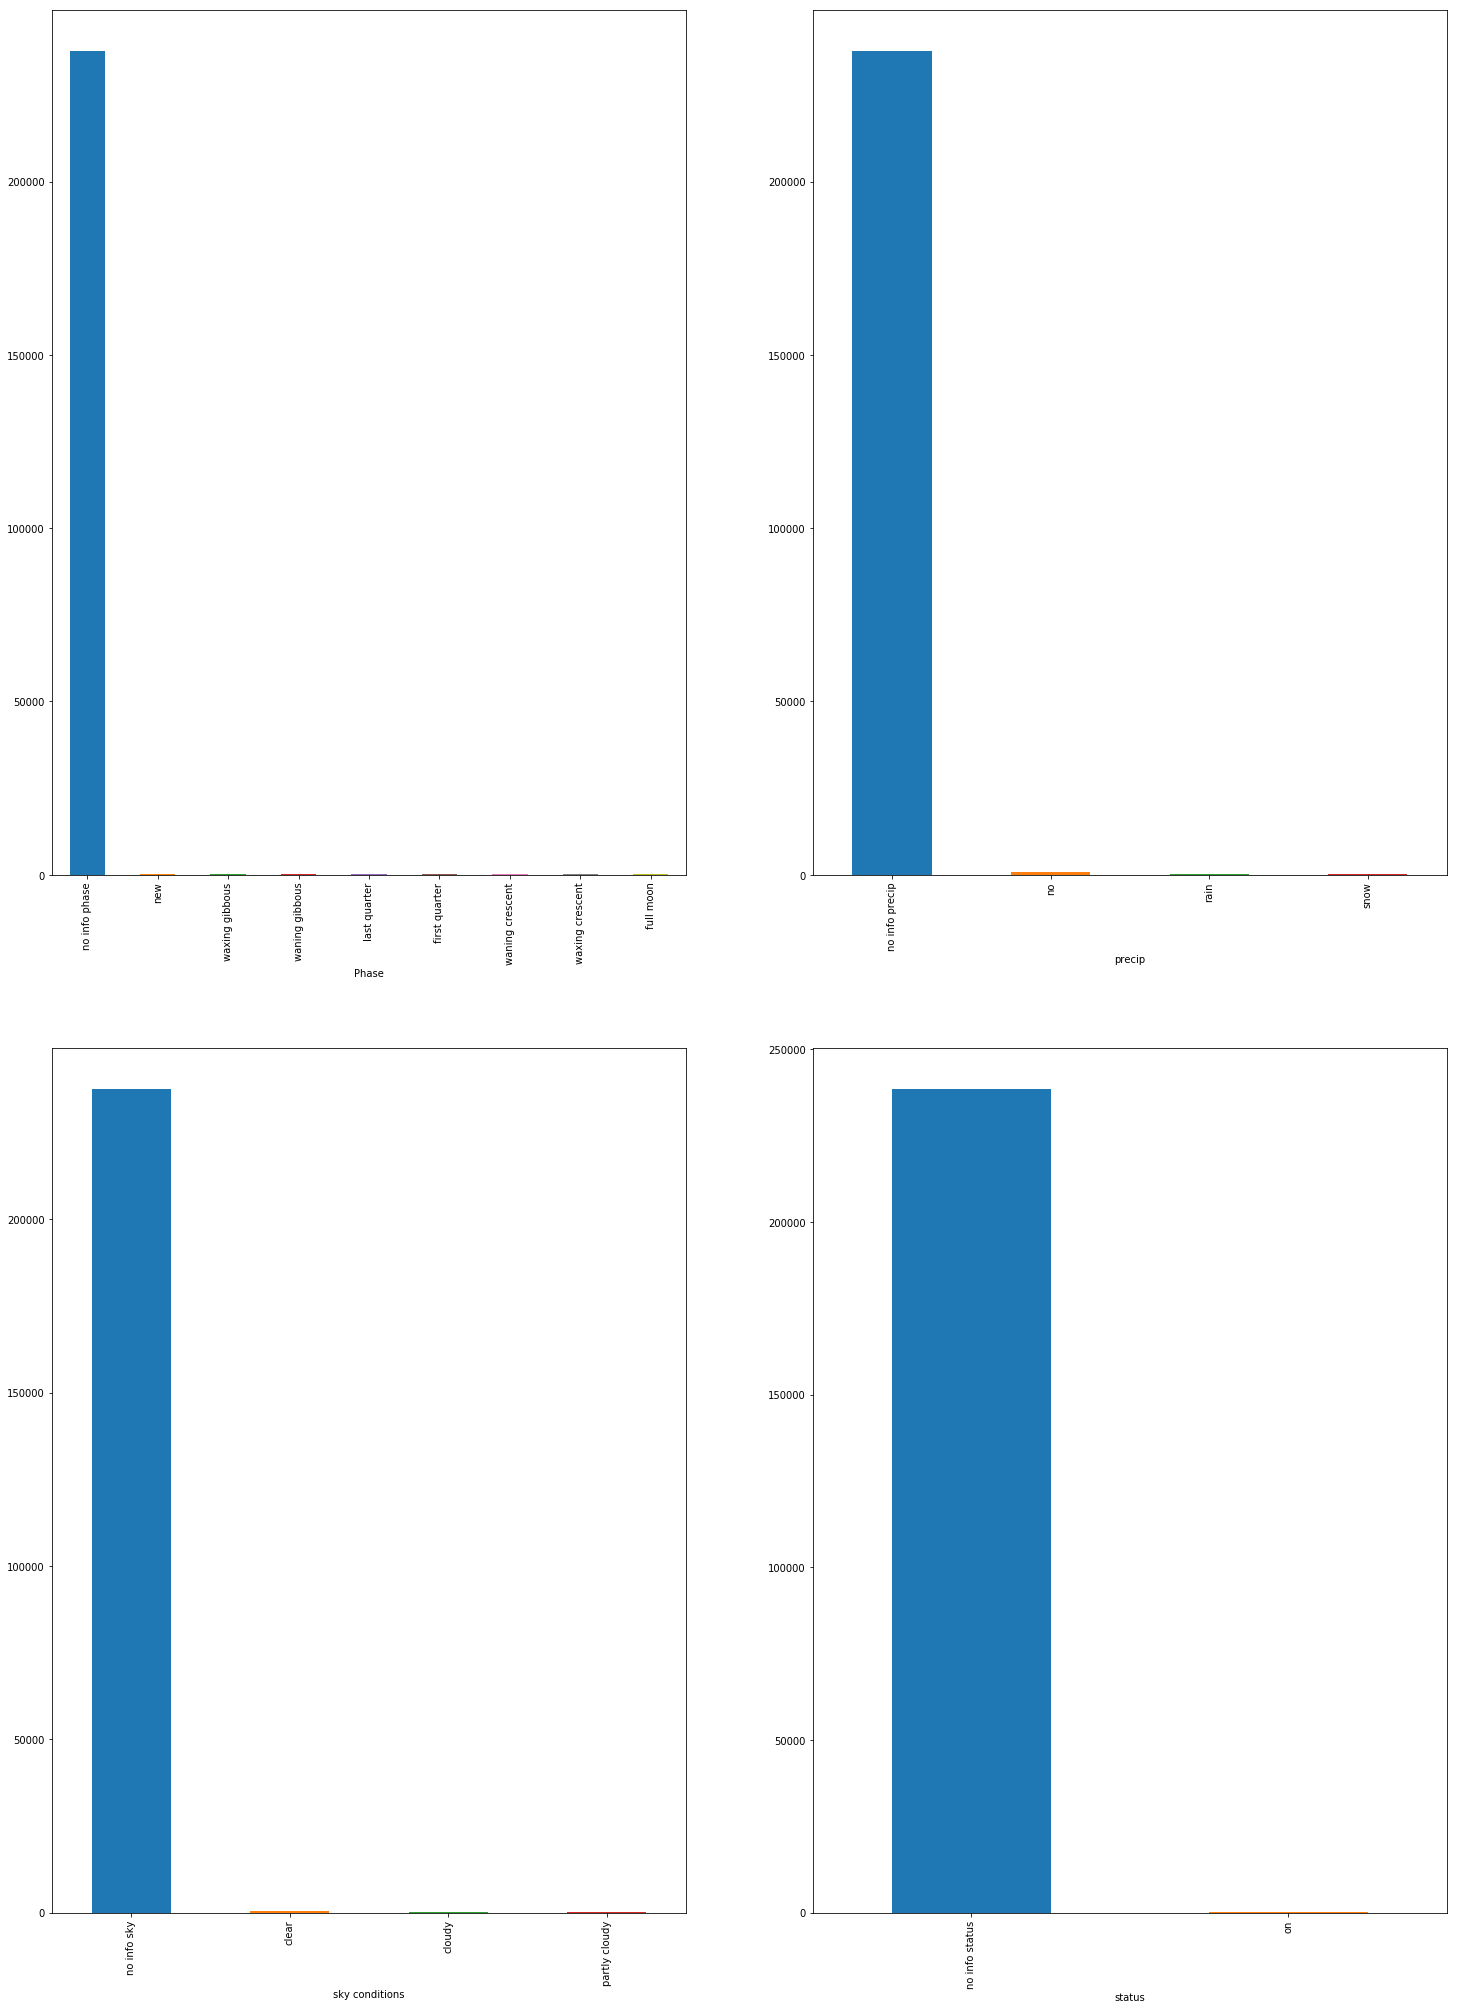

In [59]:
import seaborn as sns
import matplotlib.pyplot as plot
print("**********Phase***************")
print(data3['phase'].value_counts())
print("******************************")
print("**********precip**************")
print(data3['precip'].value_counts())
print("******************************")
print("***********sky conditions********")
print(data3['sky conditions'].value_counts())
print("******************************")
print("*********status*************")
print(data3['status'].value_counts())

plot.figure(figsize=(25,35))
plot.subplot(2,2,1)
ax = data3['phase'].value_counts().plot.bar()
ax.set_xlabel("Phase")

plot.subplot(2,2,2)
ax = data3['precip'].value_counts().plot.bar()
ax.set_xlabel("precip")

plot.subplot(2,2,3)
ax = data3['sky conditions'].value_counts().plot.bar()
ax.set_xlabel("sky conditions")

plot.subplot(2,2,4)
ax = data3['status'].value_counts().plot.bar()
ax.set_xlabel("status")

Since four features (sky conditions, status, Phase, Precip) in the combined datasets are categorical, we need to encode them. 

In [60]:
#encoding categorical variables
precip=pd.get_dummies(data3['precip'])
sky_condition = pd.get_dummies(data3['sky conditions'])
status = pd.get_dummies(data3['status'])
phase = pd.get_dummies(data3['phase'])

In [61]:
#adding all the above dataframes into our main dataframe
data3 = pd.concat([data3, phase, status, sky_condition, precip], axis=1)

want to check our final dataframe? Lets do it. 

In [62]:
data3.head(5)

,Timestamp,joker present?,number of citizens,number of thugs,phase,precip,sky conditions,status,temperature,x,y,z,first quarter,full moon,last quarter,new,no info phase,waning crescent,waning gibbous,waxing crescent,waxing gibbous,no info status,on,clear,cloudy,no info sky,partly cloudy,no,no info precip,rain,snow
0,1970-01-01 00:00:01.519862400,0,12271,11,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,1970-01-01 00:00:01.519866,0,10169,5,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,1970-01-01 00:00:01.519869600,0,12381,5,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,1970-01-01 00:00:01.519873200,0,11283,9,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1970-01-01 00:00:01.519876800,0,10289,10,no info phase,no info precip,no info sky,no info status,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


Looks it the categorical features are still present, but now we have their dummies as well. So lets get rid of the main categrical features. 

In [63]:
data3.drop(['phase','precip','sky conditions','status'],axis=1, inplace=True)

In [64]:
data3.drop(['Timestamp'], axis=1, inplace=True)

In [65]:
data3.head(5)

,joker present?,number of citizens,number of thugs,temperature,x,y,z,first quarter,full moon,last quarter,new,no info phase,waning crescent,waning gibbous,waxing crescent,waxing gibbous,no info status,on,clear,cloudy,no info sky,partly cloudy,no,no info precip,rain,snow
0,0,12271,11,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,0,10169,5,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,0,12381,5,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,0,11283,9,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,10289,10,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


OK! we are set to analyze this above dataset. 

First, lets check correlation of all the features with our target feature 'joker present?'

In [66]:
corr = data3.corr()
abs(corr['joker present?']).sort_values(ascending=False)

joker present?        1.000000
number of thugs       0.073415
number of citizens    0.053913
y                     0.045453
x                     0.018560
z                     0.017299
no info precip        0.012646
no info sky           0.012646
no info phase         0.012620
temperature           0.012145
no                    0.010521
clear                 0.009159
cloudy                0.006169
partly cloudy         0.006130
rain                  0.005766
new                   0.004469
waning crescent       0.004452
last quarter          0.004452
waning gibbous        0.004452
full moon             0.004452
waxing gibbous        0.004452
first quarter         0.004452
waxing crescent       0.004452
on                    0.003997
no info status        0.003997
snow                  0.003957
Name: joker present?, dtype: float64

Hmmm! Correlation is very less. Might be because of the reason described in the Part 1. Lets move on. 

In [67]:
#splitting target column
y_new = data3['joker present?']

In [68]:
#dropping target feature from the main dataframe
data3.drop(['joker present?'],axis=1, inplace=True)

Lets see our dataframe again to see whether things are as expected. 

In [69]:
data3.head(5)

,number of citizens,number of thugs,temperature,x,y,z,first quarter,full moon,last quarter,new,no info phase,waning crescent,waning gibbous,waxing crescent,waxing gibbous,no info status,on,clear,cloudy,no info sky,partly cloudy,no,no info precip,rain,snow
0,12271,11,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,10169,5,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,12381,5,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,11283,9,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,10289,10,0.0,-1,-1,-1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [70]:
# splitting our dataset into train and test 
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data3, y_new, test_size = 0.3, random_state = 100)

In [71]:
#check the split of train and test shape
print('Train:',X_train_new.shape)
print('Test:',X_test_new.shape)

Train: (167027, 25)
Test: (71583, 25)


Allright! Time to start model building and see how well we can predict the JOKER.....

Lets start again with **LightGBM** and see feature importance. 

In [72]:
model = lgb.LGBMClassifier(n_estimator=2000,
                         learning_rate =0.05
                         )
model.fit(X_train_new, y_train_new)
eli5.explain_weights(model, top=30)

Weight,Feature
0.4064,number_of_thugs
0.2350,number_of_citizens
0.1389,y
0.1161,x
0.1037,z
0,waning_crescent
0,temperature
0,first_quarter
0,full_moon
0,last_quarter


Cool! so it looks like number of thugs is more important feature in our dataset followed by number of citizens. Hmmm. 

In [73]:
y_pred_lgbm_new = model.predict(X_test_new)

**Confusion Matrix**? Lets check it...

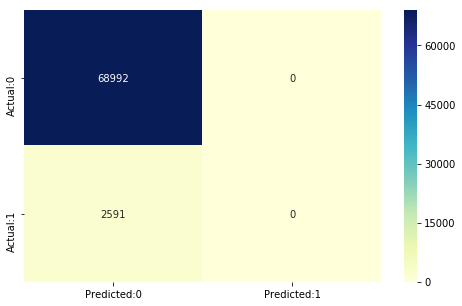

In [74]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_new,y_pred_lgbm_new)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

OK! so the above confusion matrix shows that out of 71583 records test dataset, our model with LGBMClassifier shows (68992+0) = 68992 correct prediction and (2591+0) = 2591 incorrect prediction.

Lets check some other score metrics

In [75]:
print(classification_report(y_test_new,y_pred_lgbm_new))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     68992
           1       0.00      0.00      0.00      2591

   micro avg       0.96      0.96      0.96     71583
   macro avg       0.48      0.50      0.49     71583
weighted avg       0.93      0.96      0.95     71583



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
print("Accuracy score with baseline lightgbm:", metrics.accuracy_score(y_test_new, y_pred_lgbm_new))
print("roc_auc score with baseline lightgbm:", roc_auc_score(y_test_new, y_pred_lgbm_new))

Accuracy score with baseline lightgbm: 0.963804255200257
roc_auc score with baseline lightgbm: 0.5


COOL!! we are getting 96% accuracy of our model with lightgbm.

Lets do some feature scaling using **standard scaler** and see whether we are getting any difference in our model using same lightgbm. 

In [77]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_new1 = sc.fit_transform(X_train_new)
X_test_new1 = sc.fit_transform(X_test_new)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [78]:
X_train_new1

array([[-0.35473043,  0.15144966, -0.06202063, ...,  0.06459375,
        -0.02988089, -0.01895659],
       [-0.8060331 , -0.39667403, -0.06202063, ...,  0.06459375,
        -0.02988089, -0.01895659],
       [-0.60462853, -0.30532009, -0.06202063, ...,  0.06459375,
        -0.02988089, -0.01895659],
       ...,
       [-3.78760291,  2.4352984 , -0.06202063, ...,  0.06459375,
        -0.02988089, -0.01895659],
       [ 0.65894074,  0.24280361, -0.06202063, ...,  0.06459375,
        -0.02988089, -0.01895659],
       [-0.17053324, -0.12261219, -0.06202063, ...,  0.06459375,
        -0.02988089, -0.01895659]])

In [79]:
model = lgb.LGBMClassifier(n_estimator=2000,
                         learning_rate =0.05
                         )
model.fit(X_train_new1, y_train_new)
y_pred_lgbm_new1 = model.predict(X_test_new1)
print("Accuracy score:", metrics.accuracy_score(y_test_new, y_pred_lgbm_new1))

Accuracy score: 0.963804255200257


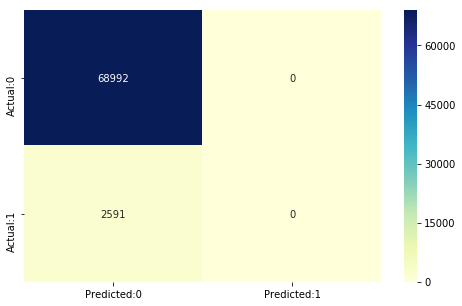

In [80]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_new,y_pred_lgbm_new)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

OK!! looks like even after feature scaling we are getting the same results. So we will move on with using our dataframe without scaling it. 

In [81]:
cv_scores = cross_val_score(model, X_train_new, y_train_new, cv=10)
print("Mean validation auc: {:.4f} +/- {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

Mean validation auc: 0.9631 +/- 0.0000


Lets move on using another classification algorithm. **Decision Tree** just like Part 1

In [82]:
model_decision = DecisionTreeClassifier(class_weight="balanced", random_state=100, max_depth=1)
model_decision.fit(X_train_new, y_train_new)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [83]:
y_pred_decision = model_decision.predict(X_test_new)

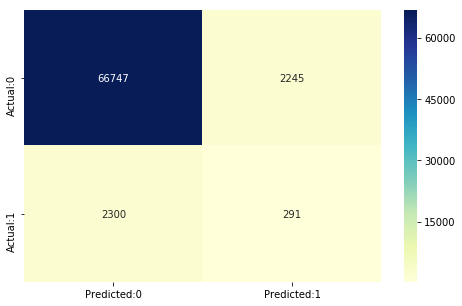

In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_new,y_pred_decision)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

So the above confusion matrix shows that out of 70956 records test dataset, our model with decision tree shows (66+298) = 66262 correct predictions and (2352+2342) = 4694 incorrect predictions

Lets check other score metrics for our model with decision tree.

In [85]:
print(classification_report(y_test_new,y_pred_decision))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     68992
           1       0.11      0.11      0.11      2591

   micro avg       0.94      0.94      0.94     71583
   macro avg       0.54      0.54      0.54     71583
weighted avg       0.94      0.94      0.94     71583



In [86]:
print("Accuracy score with decision tree:", metrics.accuracy_score(y_test_new, y_pred_decision))
print("roc_auc score with decision tree:", roc_auc_score(y_test_new, y_pred_decision))

Accuracy score with decision tree: 0.9365072712794937
roc_auc score with decision tree: 0.539885922034422


OK! so the **accuracy** of the model with decision tree is 93.6%

In [87]:
cv_scores = cross_val_score(model_decision, X_train_new, y_train_new, cv=10)
print("Mean validation auc: {:.4f} +/- {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

Mean validation auc: 0.9362 +/- 0.0016


Now lets try simplest **Logistic Regression** to your this combined dataset.

In [88]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_new,y_train_new)
y_pred_log=logreg.predict(X_test_new)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


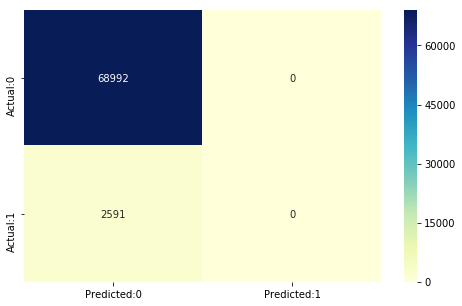

In [89]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_new,y_pred_log)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

So the above confusion matrix shows that out of 71583 records test dataset, our model with decision tree shows (68992+0) = 68992 correct predictions and (2591+0) =2591  incorrect predictions.

OK!! so now lets see some score metrics for logistic regression

In [90]:
print(classification_report(y_test_new,y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     68992
           1       0.00      0.00      0.00      2591

   micro avg       0.96      0.96      0.96     71583
   macro avg       0.48      0.50      0.49     71583
weighted avg       0.93      0.96      0.95     71583



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
print("Accuracy score with logistic regression:", metrics.accuracy_score(y_test_new, y_pred_log))
print("roc_auc score with logistic regression:", roc_auc_score(y_test_new, y_pred_log))

Accuracy score with logistic regression: 0.963804255200257
roc_auc score with logistic regression: 0.5


So, the **accuracy** of the model with logistic regression is **96%**.

In [92]:
cv_scores = cross_val_score(logreg, X_train_new, y_train_new, cv=10)
print("Mean validation auc: {:.4f} +/- {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Mean validation auc: 0.9631 +/- 0.0000


Now, let even check **Random Forest** and see what prediction says with this. 

In [93]:
from sklearn.ensemble import RandomForestClassifier
random_classifier= RandomForestClassifier(class_weight="balanced", random_state=100)
random_classifier.fit(X_train_new,y_train_new)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=100, verbose=0, warm_start=False)

In [94]:
y_pred_random= random_classifier.predict(X_test_new)

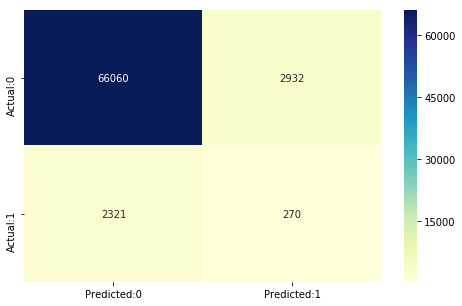

In [95]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_new,y_pred_random)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

So the above confusion matrix shows that out of 71583 records test dataset, our model with decision tree shows (66060+270) = 66330 correct predictions and (2321+2932) = 5253 incorrect predictions

In [96]:
print(classification_report(y_test_new,y_pred_random))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     68992
           1       0.08      0.10      0.09      2591

   micro avg       0.93      0.93      0.93     71583
   macro avg       0.53      0.53      0.53     71583
weighted avg       0.93      0.93      0.93     71583



In [97]:
print("Accuracy score with Random Forest:", metrics.accuracy_score(y_test_new, y_pred_random))
print("roc_auc score with Random Forest:", roc_auc_score(y_test_new, y_pred_random))

Accuracy score with Random Forest: 0.926616654792339
roc_auc score with Random Forest: 0.5308545945219251


Allright!! Lets evalute all the models till now for PART2. Looks like lightgbm and logistic regression again have the same highest accuracy of 96.3% for the combined dataset as well. We will go for lightgbm since ofcourse our dataset have outliers and lightgbm algorithm is comparatively robust to outliers compared to logistic regression algorithm. 

So BATMAN! you might want to watch out for number of thugs and number of citizens as compared to the coordiantes (x,y,z), because those two features are more focused in the model and prediction overall. 